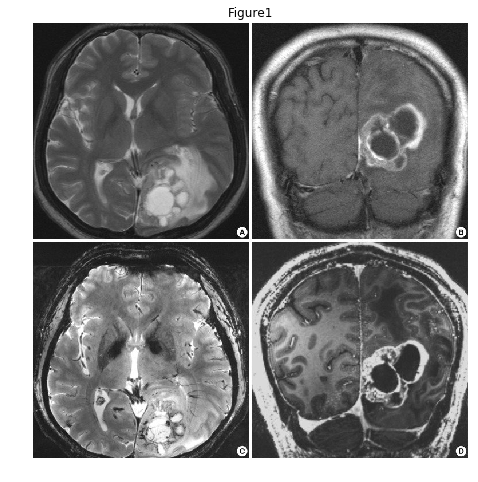

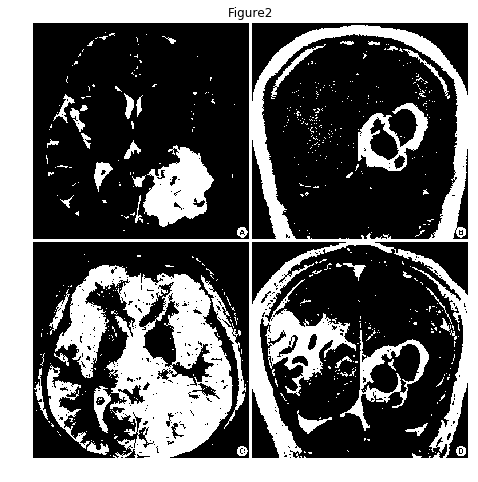

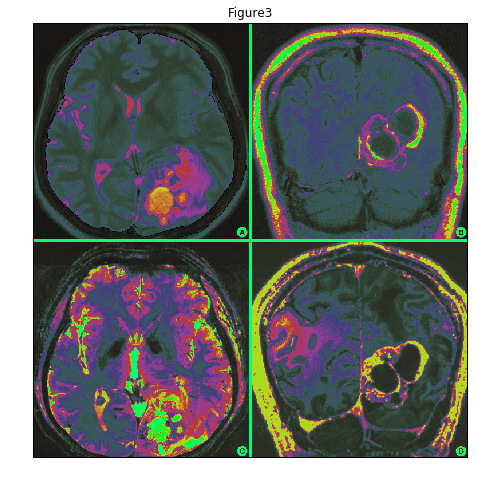

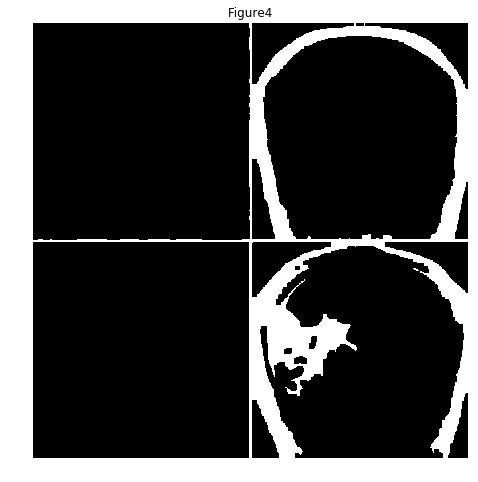

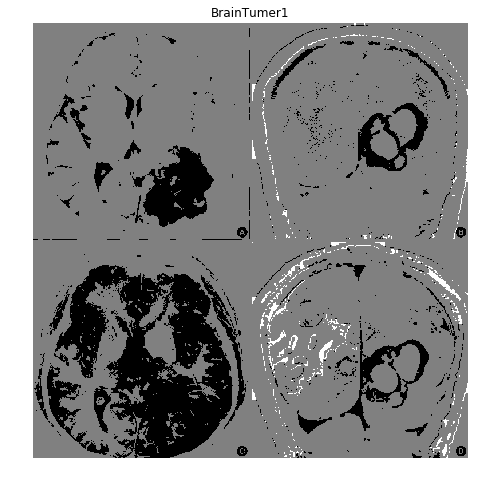

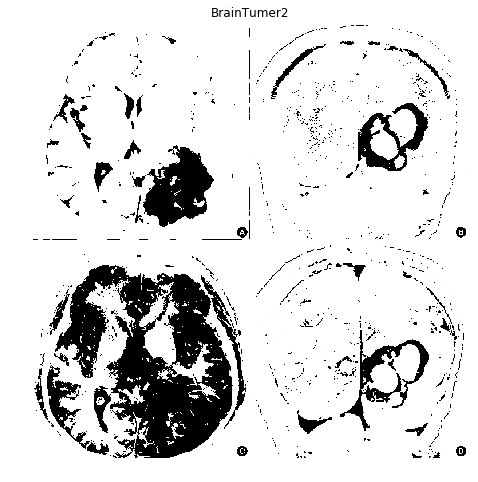

In [4]:
import numpy as numpy

import cv2

from matplotlib import pyplot as Plot_it

from skimage.morphology import extrema

from skimage.morphology import watershed as skwater

 

def ShowImage(NameOfImage,image,KindOfImage):
    # image show have different kind of image which the image show method will seperats and run it .
    # sothat only one method have being run many time in the project. 

  Plot_it.figure(figsize=(8, 8))
# the figure what we can see here is 8*8 image which we can see in the out put
# any size of image can be input but the out put will be in 8*8 size

  if KindOfImage=='bgr':#bgr
        # BGR or RGB image the image are if differnt kind among them RBG is a kind.

    b,g,r = cv2.split(image)       # get b,g,r
    # The given input image is entered and the at have diveid in to 3 diffetnt images. 
    # as we know that every color image is the combination of three color combination that is in a 
    # perfect percentage the colors are merged. 

    rgb_image = cv2.merge([r,g,b])     # switch it to rgb
    # the three image are combided to get the rgb_image.

    Plot_it.imshow(rgb_image)
# Matplot lib is usefull for ploting an image. where inthe method show we have used it. 
  elif KindOfImage=='hvs': #hsv
# as mentioned before HSV are the three colors in the combination of the colors an color image could be made
    rgb = cv2.cvtColor(image,cv2.COLOR_HSV2RGB)
# the same image bought to rgb
    Plot_it.imshow(rgb)
    # the image is seperedd and combild and input to image show method. 

  elif KindOfImage=='gray':#
    #when gray image comes to the imput this part of the code wil be executed. t

    Plot_it.imshow(image,cmap='gray')
    # the gray image enter in to image show method 

  elif KindOfImage=='rgb':
    #the rgb image directly send to the show mentod 

    Plot_it.imshow(image)
# the rgb image directly send to the show mentod 

  else:

    raise Exception("Zero Color")
    #if the four kinds of image is not found then it is considered as an exception 

  Plot_it.axis('off')
# this is the axis is of hte image 

  Plot_it.title(NameOfImage)
    # the image title will shows on the type of  the imge. 

  Plot_it.show()# it will just show the image. 

 

if __name__ == '__main__':# main is the place where it is easy to understan the project 

    image           = cv2.imread('B6.png')# image inumpyut
    # here img B6.png is the image which is in png format. 

    gray          = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)# conveted image into gray scale.
    # the image is converte in to gray image. 

    ShowImage('Figure1',gray,'gray')# ShowImage gives out put, by ploting the image

 

    ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_OTSU)# the gray image is converted into thrshold.

    ShowImage('Figure2',thresh,'gray')# the thrshold image bought as out put.

    # thrshold image contain only black an white.

 

    ret, markers = cv2.connectedComponents(thresh)# convert image into array

    # so that the back ground will be seperated from image.

    # here, brain tumor is seperated remaing parts of brain.

 

    #Get the area taken by each component. Ignore label 0 since this is the background.

    marker_area = [numpy.sum(markers==m) for m in range(numpy.max(markers)) if m!=0]

    #Big image

    big= numpy.argmax(marker_area)+1 #all the 1s are converted to 0s.                        

    #so that the big part could be explore

    brain_mask = markers==big
    #the brain mask asn the big imge all are same 
    

 

    no_brain = image.copy()# no brain in the image 

    #Remove the part of image which is not a part of brain.

    no_brain[brain_mask==False] = (0,0,0)
    # no brain part is excute so tha weh can deduct the brain image to no brain image so that we can get 
    # brain tumor. 

 

    image = cv2.imread('B6.png')
    # brain image is send to read as image. 

    gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
    # the gray image is converted. 

    ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
    # thrahold image is conutedn so that the image can be performednin in the form of 1s and 0s. 

 

 

    # noise removal

    kernel = numpy.ones((3,3),numpy.uint8)
    # all the noice is being removed by filter and thatis being save to kernal. 

    opening = cv2.morphologyEx(thresh,cv2.MORPH_OPEN,kernel, iterations = 2)
    #the filter is use to use th e moflogy extraction

 

    # sure background area

    sure_bg = cv2.dilate(opening,kernel,iterations=3)
    # this is a clear picture of the image after 3 interations . mor is the iterarion more is the clarity
    # but it is time consuming. 

 

    # Finding sure foreground area

    dist_transform = cv2.distanceTransform(opening,cv2.DIST_L2,5)
    # the trainsform image is colected itne n part. 

    ret, sure_fg = cv2.threshold(dist_transform,0.7*dist_transform.max(),255,0)
    # the image isn coloetet and wrietehnkl in the image processin . 

 

    # Finding unknown region

    sure_fg = numpy.uint8(sure_fg)
    # numpy have use in the part of hte code so the the sure image can be obstractated. 

    unknown = cv2.subtract(sure_bg,sure_fg)

 

    # Marker labelling

    ret, markers = cv2.connectedComponents(sure_fg)

 

    # Add one to all labels so that sure background is not 0, but 1

    markers = markers+1

 

 

    # Now, mark the region of unknown with zero

    markers[unknown==255] = 0
    #img si bought in to cretain pixcel possition 

    markers = cv2.watershed(image,markers)
    #the image is use watershed filter that to give the perfet segimetation line. 

    image[markers == -1] = [255,0,0]
    # the images are of many kind those are combided. 

 

    im1 = cv2.cvtColor(image,cv2.COLOR_HSV2RGB)
    # the image are use hsv filter to  get it 

    ShowImage('Figure3',im1,'gray')
    #the imge is send to imgae show method. 

 

    brain_mask = numpy.uint8(brain_mask)
    # braing mask is the same image whth use numpy

    kernel = numpy.ones((8,8),numpy.uint8)
    #the size of the imge is corrected. 

    closing = cv2.morphologyEx(brain_mask, cv2.MORPH_CLOSE, kernel)
    # haveing the correct image in the clossing look 

    ShowImage('Figure4', closing, 'gray')
    # the show image is called again. 

    im2=closing-thresh
    # the two img with brain and with out brain is being detcted so that i can get tumor result. 

    ShowImage('BrainTumer1',im2,'gray')
    #braing tumor image is send to the show image 

    im3=thresh-closing
    # the the same two images are substrasted in reverse way.

    gray1=ShowImage('BrainTumer2',im3,'gray')
    # the resule image is mostly white and the tumor is in black color because of the part of  the code. 

 

    brain_out = image.copy()
    # brain with out image is framed. 

    
    brain_out[closing==False] = (0,0,0)
    # in the fram is false and one are contribution, 